# Analysis of data from public WhatsApp groups
Exploration and visualization of the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import unicodedata, re, itertools, sys
%matplotlib inline

sns.set(style="darkgrid")

In [10]:
base = 2018

In [11]:
filepath = 'data/' + str(base) + '/fakeWhatsApp,BR_' + str(base) + '.csv'
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
df.tail(5)

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,hour,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,viral,sharings,text,misinformation
282596,-3459365403520904542,28/10/18,21:48,?,?,?,?,?,2018_59,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
282597,-3459365403520904542,28/10/18,22:06,?,?,?,?,?,2018_59,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
282598,-3459365403520904542,28/10/18,22:08,?,?,?,?,?,2018_59,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
282599,-3459365403520904542,28/10/18,22:12,?,?,?,?,?,2018_59,1,0,25,4,0,1,<Arquivo de mídia oculto>,0
282600,-3459365403520904542,28/10/18,23:12,?,?,?,?,?,2018_59,1,0,25,4,0,1,<Arquivo de mídia oculto>,0


# Basic statistics

In [12]:
df.describe()[['characters','words','sharings']]

,characters,words,sharings
count,282601.000000,282601.000000,282601.000000
mean,97.638688,14.962091,1.755716
std,407.238452,61.842076,5.122241
min,1.000000,1.000000,1.000000
25%,25.000000,4.000000,1.000000
50%,25.000000,4.000000,1.000000
75%,43.000000,7.000000,1.000000
max,65536.000000,5486.000000,91.000000


In [13]:
total_msg = len(df)
total_groups = len(df['group'].unique())
total_users = len(df['id'].unique())
print('Total groups analyzed: ',total_groups)
print('Total unique users: ', total_users)
print('Total messages: ', total_msg)
print('Message/user ratio: ', total_msg/len(df['id'].unique()))

Total groups analyzed:  59
Total unique users:  5364
Total messages:  282601
Message/user ratio:  52.68475018642804


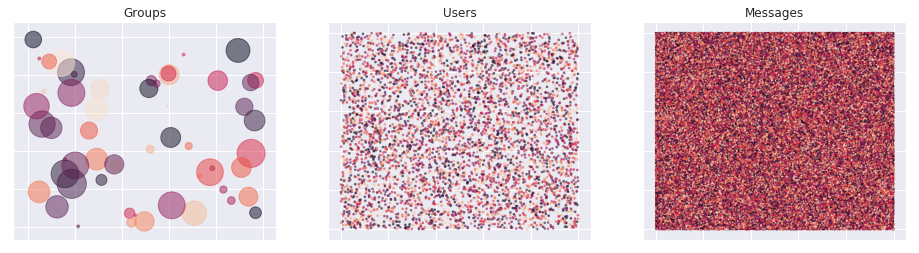

In [14]:
#Visualization of scale
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure(figsize=(16, 4))

### grupos
N = total_groups
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.subplot(131)
plt.title('Groups')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####users
N = total_users
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(132)
plt.title('Users')
plt.scatter(x, y, s=3, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####msgs
N = total_msg
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(133)
plt.title('Messages')
plt.scatter(x, y, s=1, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

plt.show()

## Proportions

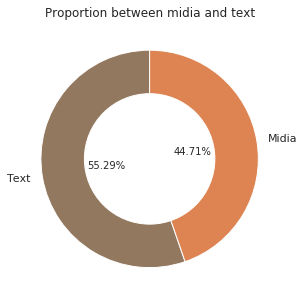

In [25]:
# midia and text
#plt.style.use('default')
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between midia and text')
x = [len(df[df['midia']==0]),len(df[df['midia']==1])]
names = ['Text','Midia']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C5','C1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

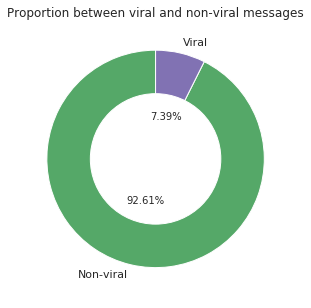

In [21]:
#sharings
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between viral and non-viral messages')
x = [len(df[df['viral']==0]),len(df[df['viral']==1])]
names = ['Non-viral','Viral']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C4'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

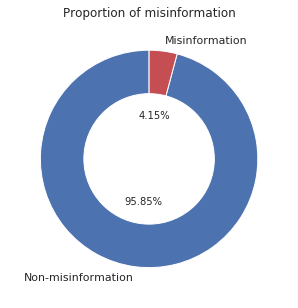

In [20]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of misinformation')
x = [len(df[df['misinformation']==0]),len(df[df['misinformation']==1])]
names = ['Non-misinformation','Misinformation']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# GEOGRAPHIC DATA

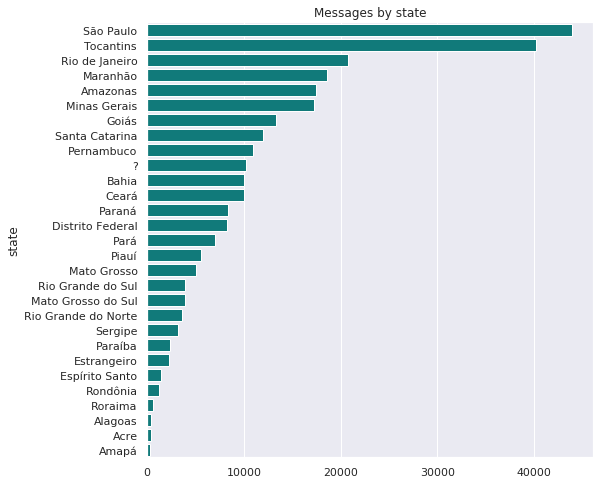

In [32]:
#plt.style.use('default')
counts = df.groupby(by='state').count()['id'].sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.title('Messages by state')
sns.barplot(y=counts.index,x=counts.values, color = 'darkcyan')
plt.show()

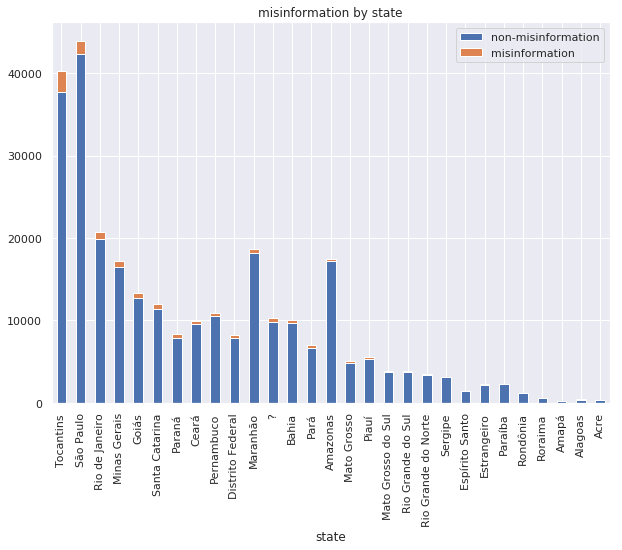

In [73]:
non_mis_counts = df[df['misinformation'] == 0].groupby(by='state').count()['id'].sort_index(ascending=False) 
misinformations_counts = df[df['misinformation'] == 1].groupby(by='state').count()['id'].sort_index(ascending=False) 
states = list(counts.index)
mis_by_state = pd.DataFrame({'non-misinformation':non_mis_counts,
                             'misinformation':misinformations_counts})
t = 'misinformation by state'
mis_by_state = mis_by_state.sort_values(by = 'misinformation', ascending = False)
mis_by_state.loc[:,['non-misinformation', 'misinformation']].plot.bar(stacked=True, figsize=(10,7),title = t)

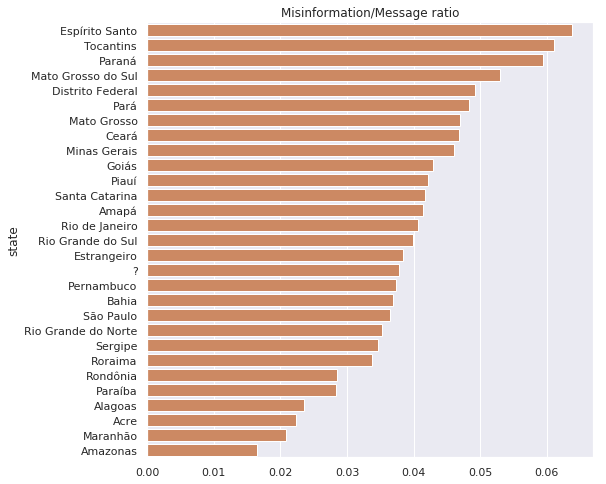

In [54]:
#plt.style.use('default')
counts = df.groupby(by='state').count()['id'].sort_index(ascending=False)
misinformations_counts = df[df['misinformation'] == 1].groupby(by='state').count()['id'].sort_index(ascending=False) 
ratio = np.true_divide(misinformations_counts.values,counts.values)
misinformation_ratio = pd.Series(ratio, index = counts.index)
misinformation_ratio = misinformation_ratio.sort_values(ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Misinformation/Message ratio')
sns.barplot(y=misinformation_ratio.index,x = misinformation_ratio.values, color = 'C1')
plt.show()

In [28]:
# import geopandas as gpd
# infos_ufs = gpd.read_file('/home/cabral/Documents/data/geo/bcim_2016_21_11_2018.gpkg',layer = 'lim_unidade_federacao_a')
# infos_ufs.columns

In [11]:
# plt.style.use('default')
# contagens = df.groupby(by='ESTADO').count()['ID'].sort_values(ascending=False)
# contagens = pd.DataFrame({"ESTADO":contagens.index,"MENSAGENS":contagens.values})
# contagens = contagens[contagens['ESTADO'] != 'Extrangeiro']
# infos_ufs.rename({'nome':'ESTADO'}, axis=1, inplace = True)
# brasil = infos_ufs.merge(contagens, on = 'ESTADO', how = 'left')


# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# plt.grid(False)
# plt.title('Mensagens por estado')
# brasil.plot(ax = ax,
#            column = 'MENSAGENS',
#            cmap = 'Oranges',
#            figsize = (12,8),
#            legend = True)
# plt.show()


In [12]:
# contagens = df.drop_duplicates(subset = 'ID').groupby(by='ESTADO').count()['ID'].sort_values(ascending=False)
# contagens = pd.DataFrame({"ESTADO":contagens.index,"CHIPS":contagens.values})
# brasil = infos_ufs.merge(contagens, on = 'ESTADO', how = 'left')

# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)
# plt.grid(False)
# plt.title('Usuários por estado')
# brasil.plot(ax = ax,
#            column = 'CHIPS',
#            cmap = 'Blues',
#            figsize = (12,8),
#            legend = True)
# plt.show()

In [13]:
# plt.figure(figsize=(5, 5))
# plt.title('Proporção entre entre mensagens enviadas de DDIs brasileiros e estrangeiros')
# x = [len(df[df['PAIS']=='BRASIL']),len(df[df['PAIS']!='BRASIL'])]
# names = ['Brasil','Outros países']
# my_circle=plt.Circle( (0,0), 0.6, color='white')
# plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['darkcyan','C1'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()

In [14]:
# contagens = df[df['PAIS']!='BRASIL'].groupby(by='PAIS').count()['ID'].sort_values(ascending=False)
# plt.figure(figsize=(15, 5))
# plt.xticks(rotation='vertical')
# plt.title('Mensagens por DDI estrangeiro')
# sns.barplot(x=contagens.index,y=contagens.values, color = 'C3')
# plt.show()

In [15]:
# df[df['PAIS']!='BRASIL']

# Distribuitions

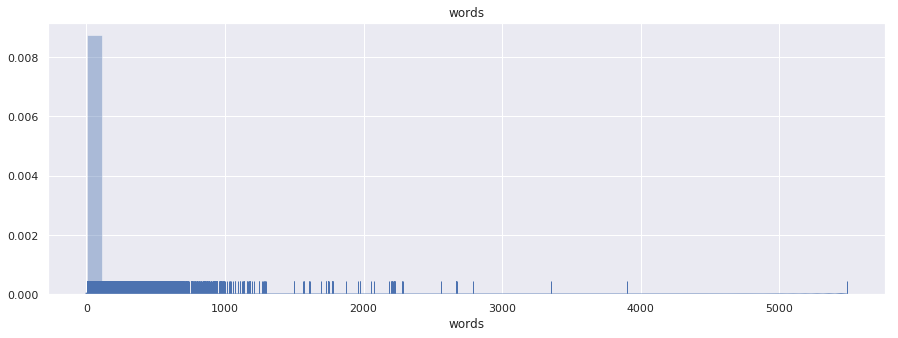

In [56]:
plt.figure(figsize=(15, 5))
plt.title('words')
sns.distplot(df[df['midia'] == 0]['words'], rug = True, kde = True)
plt.show()

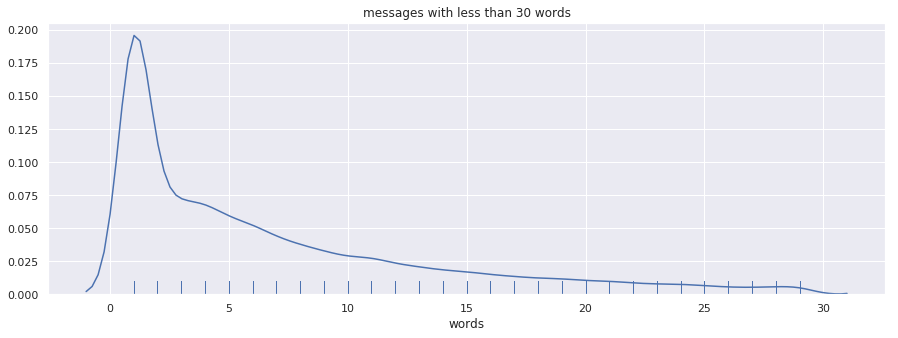

In [57]:
plt.figure(figsize=(15, 5))
plt.title('messages with less than 30 words')
sns.distplot(df[(df['midia'] == 0) & (df['words'] < 30)]['words'], hist = False, rug = True, kde = True)
plt.show()

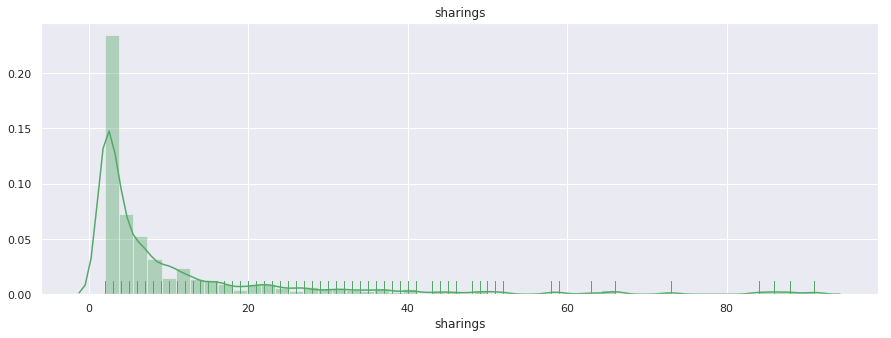

In [61]:
plt.figure(figsize=(15, 5))
plt.title('sharings')
sns.distplot(df[df['sharings'] > 1]['sharings'], rug = True, kde = True, color = 'C2')
plt.show()

# Most active users

In [62]:
df['text'] = [str(m) for m in df['text']]

def getUserData(df,users):
    '''
    Creates a DataFrame with most active users information
    Input: DataFrame with all data, number of users desired
    Output: DataFrame with number of messages, number of texts, number of midia files, ddd, ddi, state, country and all texts
    '''
    texto = []
    midia = []
    pais = []
    estado = []
    ddd = []
    ddi = []
    msg_str = []
    for user in users.index:
        texto.append(len(df[(df['id'] == user) & (df['midia']==0)]))
        midia.append(len(df[(df['id'] == user)]) - len(df[(df['id'] == user) & (df['midia']==0)]))
        pais.append(df[df['id']==user].iloc[0]['country'])
        estado.append(df[df['id']==user].iloc[0]['state'])
        ddd.append(df[df['id']==user].iloc[0]['ddd'])
        ddi.append(df[df['id']==user].iloc[0]['ddi'])
        msgs = df[(df['id']==user) & (df['midia']==0)]['text']
        msgs = list(msgs.values)
        msgs = " <-> ".join(msgs)
        msg_str.append(msgs)
        
    topUsers = pd.DataFrame({'id':user, 'count messsages':users.values, 
                             'texts':texto, 'midia':midia,
                             'ddi':ddi,'ddd':ddd,'country':pais,
                             'state':estado,'messages':msg_str})    
    return topUsers
    

def getTopUsers(df,top=20):
    groupedByid = df.groupby(['id']).count()
    groupedByid = groupedByid.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByid)

top20 = getTopUsers(df,20)
top20

,id,count messsages,texts,midia,ddi,ddd,country,state,messages
0,-3545133711641780471,4396,3742,654,55,11,BRASIL,São Paulo,Ontem eu vi um vídeo de um travesti xingando a...
1,-3545133711641780471,2332,972,1360,?,?,?,?,Fazer campanha contraria tbm ajuda <-> É verda...
2,-3545133711641780471,2064,948,1116,55,67,BRASIL,Mato Grosso do Sul,Kkkk as urnas que são fraudadas kkkk essa desc...
3,-3545133711641780471,2020,1587,433,55,63,BRASIL,Tocantins,"*Ordem em meio a caos, o sucesso das escolas m..."
4,-3545133711641780471,1810,828,982,55,31,BRASIL,Minas Gerais,Para bom entendedor meia palavra basta.\nNo ge...
5,-3545133711641780471,1584,466,1118,55,14,BRASIL,São Paulo,Motor elétrico trifásico de 96 volts e 71 cava...
6,-3545133711641780471,1271,388,883,55,61,BRASIL,Distrito Federal,Liturgia Diária\nVoltar\nQuer ver a Liturgia d...
7,-3545133711641780471,1172,994,178,55,99,BRASIL,Maranhão,Cara <-> Assisto os vídeos do Eneas hj em dia ...
8,-3545133711641780471,1166,284,882,55,91,BRASIL,Pará,Olha aí Representantes de ONGs ensinando os ve...
9,-3545133711641780471,1126,950,176,55,92,BRASIL,Amazonas,Boa noite caros amigos! <-> 🤝🏼 <-> Seja bem vi...


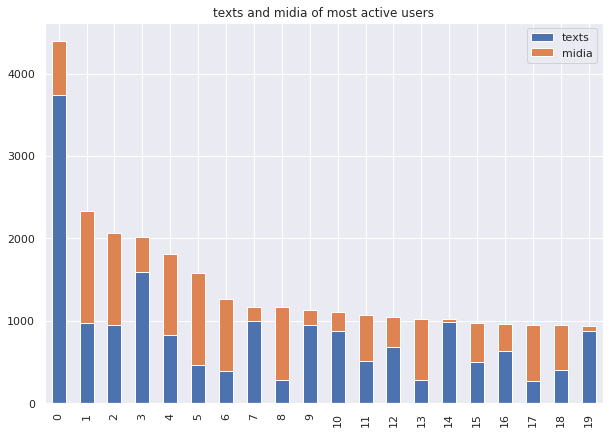

In [63]:
t = 'texts and midia of most active users'
top20.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Users that shared more midia
Possible bot activity

In [74]:
def getTopMidiaUsers(df,top=20):
    groupedByID = df[df['midia']==1].groupby(['id']).count()
    groupedByID = groupedByID.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByID)

top20 = getTopMidiaUsers(df,20)
top20

,id,count messsages,texts,midia,ddi,ddd,country,state,messages
0,2839535797075678550,1360,972,1360,?,?,?,?,Fazer campanha contraria tbm ajuda <-> É verda...
1,2839535797075678550,1118,466,1118,55,14,BRASIL,São Paulo,Motor elétrico trifásico de 96 volts e 71 cava...
2,2839535797075678550,1116,948,1116,55,67,BRASIL,Mato Grosso do Sul,Kkkk as urnas que são fraudadas kkkk essa desc...
3,2839535797075678550,982,828,982,55,31,BRASIL,Minas Gerais,Para bom entendedor meia palavra basta.\nNo ge...
4,2839535797075678550,883,388,883,55,61,BRASIL,Distrito Federal,Liturgia Diária\nVoltar\nQuer ver a Liturgia d...
5,2839535797075678550,882,284,882,55,91,BRASIL,Pará,Olha aí Representantes de ONGs ensinando os ve...
6,2839535797075678550,741,279,741,55,31,BRASIL,Minas Gerais,Acabou de explodir o gasômetro da Usiminas <->...
7,2839535797075678550,683,272,683,55,63,BRASIL,Tocantins,"Bolsonaro já está eleito nos EUA, e o primeiro..."
8,2839535797075678550,654,3742,654,55,11,BRASIL,São Paulo,Ontem eu vi um vídeo de um travesti xingando a...
9,2839535797075678550,556,515,556,55,18,BRASIL,São Paulo,👏🏼👏🏼👏🏼😎😂 <-> 💪👊🏼🤜👊🏼😎😎😂😂 <-> https://sajjasite....


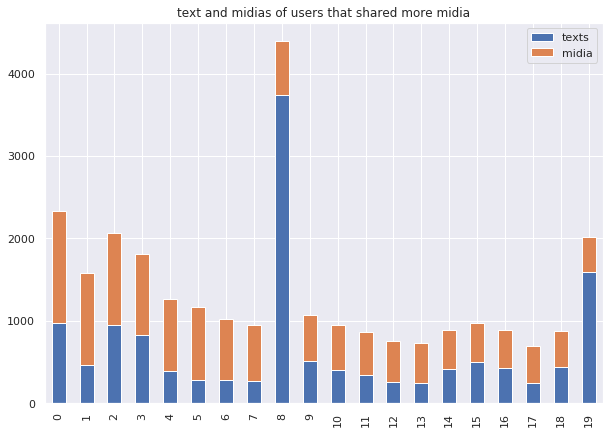

In [75]:
t = 'text and midias of users that shared more midia'
top20.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Messages more shared in different groups

In [77]:
#df = df.groupby('domain')['ID'].nunique()
msg_group = df[df['viral']==1][['text','group']]
msg_group = msg_group.groupby('text')['group'].nunique()
msg_group = msg_group.sort_values(ascending=False)
top20 = msg_group[0:20]
top20 = top20.to_frame()
top20

,group
text,
"_*TSE informa:*_ 7,2 milhões de votos anulados pelas urnas! A diferença de votos que levaria à vitória de Bolsonaro no primeiro turno foi de menos de 2 milhões .\nO TSE tem obrigação de esclarecer os motivos que levaram à anulação de mais de 7,2 milhões de votos que representam 6,2% do total. A anulação só pode acontecer em voto de papel, porque permite rasuras ou ambiguidade.\n\nSe você enviar para apenas 20 contatos em um minuto, o Brasil inteiro vai desmascarar este Bandido. NÃO quebre essa corrente. Os incautos precisam ser esclarecidos antes que seja tarde demais...",34
"Sem palavras, só divulgue para seus contatos e peçam para que todos façam o mesmo simultaneamente e daqui um minuto está mensagem estará nos quatros cantos da terra.",34
"Vamos fazer campanha inteligente e garantir a vitória!?\n- Não compartilhem nada ofensivo ao Nordeste!!! 2014 internet bombou de ofensas e a Dilma cresceu absurdamente la no segundo turno!\n- Compartilhe mensagens positivas dele e da mudança!\n- Guarde pra VC o medo, transmita confiança para cativar votos!\n- Respeite a opinião alheia!\n- Cheque a Notícia, Fake News joga contra!\nEleição tem dois turnos essa é a regra do jogo! AGORA É A HORA!",32
"Vamos dar ""dislike"" nos vídeos dos artistas ""rouanet's"" ""EleNão""\nClica no link, vai aparecer o vídeo e vc clica na mãozinha 👎🏼. A diferença do 👎🏼 para o 👍🏼 é gigantesca.\n\nAnitta\nhttps://youtu.be/QmrnZobpyW8\n\nDaniella Mercury\nhttps://youtu.be/GlrKJBfiXcI\n\nLetícia Sabatella\nhttps://youtu.be/83Z0ZxqJvPA\n\nLetícia Colin\nhttps://youtu.be/gtj9Ylc3Chc\n\nMarília Mendonça \nhttps://youtu.be/jQGtJq3yZh0\n\nClipe ""EleNão""\nhttps://youtu.be/SBBVS84oYP8",30
Enquete para presidência! *Quem é seu candidato?* Vote e veja quem esta ganhando as Eleições 2018 *Acesse* ⤵\nhttps://pesquisaeleitoral2018.online/eleitoral/2018/,29
"Golpe, Golpe, Golpe... Adelio foi autorizado a dar entrevista dia 5 sexta-feira depois q acabar o horário eleitoral. Fontes confiáveis e dignas viram os textos. Ele vai dizer q foi o próprio partido de Bolsonaro q armou tudo. Vai contar todos os detalhes. Não acreditem meus irmãos será a última cartada nojenta, nazista dessa gentalha vermes vermelhos. A TV vai ficar comentando na sexta a noite, sábado e domingo, quando Bolsonaro não terá mais como se defender. TEMOS Q PREPARAR TODO MUNDO DESDE AGORA! Passe p todos os amigos e irmãos. Repassem esse texto urgente e aos montes p não pegar ninguém de surpresa. Deus será conosco nessa batalha contra as hostes do inferno.",29
"Nota Oficial :\n\nPessoal aqui quem lhe falam é Eduardo Bolsonaro, candidato a deputado federal.\n\nPessoal este é um recadinho muito rápido, peço a todos que compartilhem com o máximo de pessoas ! Compartilhem em grupos ! Em contatos, nas mídias sociais.\n\nPessoal, amanhã dia 07/10 dia de eleição ! Não compareça a sua seção com camiseta de apoio ao Jair Bolsonaro. \n\nPessoal em todos estes anos de eleição, nunca foi admitido este tipo de manifestação, mesmo silenciosa, é considerado boca de urna, é considerado CRIME !\n\nEstá muito estranho está historinha de poder ir votar com a camiseta do candidato. Isto está nós cheirando golpe, para anular o voto de vocês ! \n\nEntão amanhã não compareçam com a camiseta em apoio ao candidato Jair BOLSONARO, vamos ir de amarelo, camiseta do Brasil, mas por favor, vamos desconfiar de tudo ! Isso está nos gerando golpe no TSE contra a vitória em primeiro turno de Bolsonaro. \n\nEles podem não anular 100% dos votos, mas se eles anularem 15% já perdemos em primeiro turno. \n\nEntão desconfiem de tudo. \n\nAgradeço a todos que compartilharem essa mensagem.\n\nEduardo Bolsonaro,\nBrasil acima de tudo, Deus Acima de Todos.\n\n\n#17",29
Vota aí e repassa!!! Vamos ver se o ibope está certo?\n\n\nhttps://pt.surveymonkey.com/r/W85R38F,28
"Olha só que ideia interessante...\n\nSe formos 75 milhões de filiados ao psl, obrigatoriamente terão que haver no mínimo 75 milhões de votos para Bolsonaro nas urnas...\n\nAí

# Viral messages
Possible misinformation

In [25]:
groupedByMsg = df[(df['MIDIA'] == 0) & (df['MENSAGEM'] != 'Aguardando esta mensagem') & 
                  (df['MENSAGEM'] != 'Mensagem incompatível') & 
                  (df['MENSAGEM'] != 'Esta mensagem foi apagada') & (df['MENSAGEM'] != 'nan') & 
                  (df['PALAVRAS'] > 3)].groupby(['MENSAGEM']).count()
groupedByMsg = groupedByMsg.sort_values('DATA', ascending=False)['ID']
groupedByMsg = pd.DataFrame(groupedByMsg)
groupedByMsg = groupedByMsg.rename(columns={'ID':'QUANTIDADE'})
groupedByMsg = groupedByMsg[groupedByMsg['QUANTIDADE'] > 1]
groupedByMsg[0:20]

,QUANTIDADE
MENSAGEM,
"_*TSE informa:*_ 7,2 milhões de votos anulados pelas urnas! A diferença de votos que levaria à vitória de Bolsonaro no primeiro turno foi de menos de 2 milhões .\nO TSE tem obrigação de esclarecer os motivos que levaram à anulação de mais de 7,2 milhões de votos que representam 6,2% do total. A anulação só pode acontecer em voto de papel, porque permite rasuras ou ambiguidade.\n\nSe você enviar para apenas 20 contatos em um minuto, o Brasil inteiro vai desmascarar este Bandido. NÃO quebre essa corrente. Os incautos precisam ser esclarecidos antes que seja tarde demais...",91
"Sem palavras, só divulgue para seus contatos e peçam para que todos façam o mesmo simultaneamente e daqui um minuto está mensagem estará nos quatros cantos da terra.",88
"Vamos fazer campanha inteligente e garantir a vitória!?\n- Não compartilhem nada ofensivo ao Nordeste!!! 2014 internet bombou de ofensas e a Dilma cresceu absurdamente la no segundo turno!\n- Compartilhe mensagens positivas dele e da mudança!\n- Guarde pra VC o medo, transmita confiança para cativar votos!\n- Respeite a opinião alheia!\n- Cheque a Notícia, Fake News joga contra!\nEleição tem dois turnos essa é a regra do jogo! AGORA É A HORA!",86
Enquete para presidência! *Quem é seu candidato?* Vote e veja quem esta ganhando as Eleições 2018 *Acesse* ⤵\nhttps://pesquisaeleitoral2018.online/eleitoral/2018/,84
"Vamos dar ""dislike"" nos vídeos dos artistas ""rouanet's"" ""EleNão""\nClica no link, vai aparecer o vídeo e vc clica na mãozinha 👎🏼. A diferença do 👎🏼 para o 👍🏼 é gigantesca.\n\nAnitta\nhttps://youtu.be/QmrnZobpyW8\n\nDaniella Mercury\nhttps://youtu.be/GlrKJBfiXcI\n\nLetícia Sabatella\nhttps://youtu.be/83Z0ZxqJvPA\n\nLetícia Colin\nhttps://youtu.be/gtj9Ylc3Chc\n\nMarília Mendonça \nhttps://youtu.be/jQGtJq3yZh0\n\nClipe ""EleNão""\nhttps://youtu.be/SBBVS84oYP8",73
Vota aí e repassa!!! Vamos ver se o ibope está certo?\n\n\nhttps://pt.surveymonkey.com/r/W85R38F,66
"Você foi selecionado para participar da *Nova pesquisa eleitoral* da _DATAFOLHA_, *responda* no link a seguir: http://datafolha.pesquisabr.site\nSua opinião é muito importante para o Brasil.",66
"Nota Oficial :\n\nPessoal aqui quem lhe falam é Eduardo Bolsonaro, candidato a deputado federal.\n\nPessoal este é um recadinho muito rápido, peço a todos que compartilhem com o máximo de pessoas ! Compartilhem em grupos ! Em contatos, nas mídias sociais.\n\nPessoal, amanhã dia 07/10 dia de eleição ! Não compareça a sua seção com camiseta de apoio ao Jair Bolsonaro. \n\nPessoal em todos estes anos de eleição, nunca foi admitido este tipo de manifestação, mesmo silenciosa, é considerado boca de urna, é considerado CRIME !\n\nEstá muito estranho está historinha de poder ir votar com a camiseta do candidato. Isto está nós cheirando golpe, para anular o voto de vocês ! \n\nEntão amanhã não compareçam com a camiseta em apoio ao candidato Jair BOLSONARO, vamos ir de amarelo, camiseta do Brasil, mas por favor, vamos desconfiar de tudo ! Isso está nos gerando golpe no TSE contra a vitória em primeiro turno de Bolsonaro. \n\nEles podem não anular 100% dos votos, mas se eles anularem 15% já perdemos em primeiro turno. \n\nEntão desconfiem de tudo. \n\nAgradeço a todos que compartilharem essa mensagem.\n\nEduardo Bolsonaro,\nBrasil acima de tudo, Deus Acima de Todos.\n\n\n#17",63
"Olha só que ideia interessante...\n\nSe formos 75 milhões de filiados ao psl, obrigatoriamente terão que haver no mínimo 75 milhões de votos para Bolsonaro nas urnas...\n\nAí não tem como fraudar...\n👇👇👇👇👇👇👇\n\n\nGalera estamos em uma campanha massiva de cadastro de filiação no site do PSL, é de graça, pegue seu RG, CPF e Titulo de Eleitor - queremos passar dos 50 milhões de inscritos -, assim poderemos contrapor a fraude do voto contra o TSE, entre no link, faça seu cadastro e divulgue em toda rede social, convoque os demais. 👇😎🙏🇧🇷🇧🇷😎👇Vamos COMPARTILHAR em todas as redes sociais!\n\nhttps://www.pslnacional.org.br/\n\nPrecisamos alcançar 75 

In [26]:
len(groupedByMsg)

5747

# Identical messages shared by the same user
Possible bot activity

In [80]:
#BOT
#Número de vezes que um mesmo usuário compartilha a mesma mensagem
groupedByMsgAndID = df[(df['midia'] == 0) & (df['characters'] > 10)].groupby(['id','text']).count()
groupedByMsgAndID = pd.DataFrame(groupedByMsgAndID.sort_values('date', ascending=False)['date'])
groupedByMsgAndID = groupedByMsgAndID.rename(columns={'date':'count'})
groupedByMsgAndID[groupedByMsgAndID['count'] > 5]

,,count
id,text,
-8811763268278453132,"https://www.instagram.com/jairmessiasbolsonaro/\n*Atenção*\n*Nesse momento o nosso candidato está com 1.9 Milhões de seguidores no Instagram,vamos repassar o link do perfil oficial dele para todos os amigos, Familiares e conhecidos que irão votar nele para segui-lo caso não siga aínda*\n\n*Rumo aos 2 Milhões*\n*Repassem essa mensagem em todos os grupos de Direita que vc está*",43
484315296795177283,💪🏻🇧🇷1⃣7⃣🇧🇷👊🏻,27
4281388427488472786,Bom dia para todos!,24
-7649344784600108030,*📍PAGAMENTOS DE BOLETOS COM ATE 50% DE DESCONTO📍*\n\n*📄 PAGAMOS QUALQUER TIPO DE BOLETO QUE TENHA CÓDIGO DE BARRAS📄*\n\n*😱 CLIENTE SO PAGA APOS O ENVIO COMPROVANTE DO SEU PAGAMENTO😱*\n\n*📍 INFORMAÇÕES PV*,24
4305486479648129759,"✅✅ATENÇÃO✅✅\nNesta quarta-feira dia 12/09/2018 *TODOS os apoiadores do BOLSONARO* estão sendo convocados para estarem doando sangue *em todo Brasil*. Faça sua parte e doe, não podemos esquecer que *foi o sangue de um desconhecido Doador que salvou a vida de Jair Bolsonaro.* \n.\n.\n.\nEu farei minha parte com certeza aqui em Palmas do Tocantins.",21
...,...,...
-9166534760459654877,*Atenção Direita Tocantins* 🇧🇷\n\nHoje ás 21 horas faremos uma live para informar sobre às principais notícias da campanha do Bolsonaro aqui no estado do Tocantins e no Brasil.\n\n_Convide seus amigos e compartilhe a Live._\n\nA Live streaming será transmitida pela página Bolsonaro Tocantins.\n\nLink da página 👇\n\nhttps://goo.gl/3juN46,6
2878545449163323727,"🔥🔥Atenção🔥🔥 vamos *_multiplicar os grupos de WhatsApp Pró-Bolsonaro como vírus_* , e capilarizar a campanha entre nossos contatos e grupos de trabalho, parentes, vizinhos, amigos, igreja, etc.......🇧🇷 Se cada um de nós aceitar o desafio de *criar ao menos um grupo* , e encher ao máximo de pessoas, talvez possamos oferecer alguma resistência contra as fakenews e os ataques covardes da grande mídia, que está quase toda ao lado dos corruptos poderosos dispostos a tudo para manterem-se no poder.......🇧🇷 Nós não temos a mídia ao nosso lado, estamos largados a nossa própria sorte. é a sua liberdade que está em jogo.......Repasse esta ideia.......🇧🇷🇧🇷🇧🇷🇧🇷 *Dica* : não repassem materiais ofensivos a quem não vota em Bolsonaro, pois precisamos ganhar as pessoas, e não, ofendê-las.......nem caia em provocações, pois eles possuem militantes profissionais astutos e treinados te fazer perder tempo discutindo.......🇧🇷 Estamos na reta final da eleição mais importante dos últimos tempos.....estamos a um passo de: ou nos libertar de uma vez por todas da ameaça comunista que há décadas está destruindo este país; ou de sermos escravizados(🇻🇪) de vez pelos terroristas e comunistas Foro de São Paulo.......🇧🇷 não deixe para depois, comece agora, pois cada segundo é precioso para quem está prestes a perder a liberdade⏳.......🇧🇷 *a meta é vencer no 1° turno* 🇧🇷",6
-8319465820593062054,"Sugerir voto por WhatS APP a partir da 0h de domingo é crime\nQuem fizer campanha para um candidato ou partido político pelas redes sociais no dia da eleição pode ser punido com até um ano de prisão ou multa de até R$ 15.961,50\nA partir da meia-noite do dia de domingo, está proibido fazer qualquer espécie de propaganda de partidos políticos ou de seus candidatos, segundo o artigo 81 da resolução 23.551, do Supremo Tribunal Eleitoral.\nPORTANTO CAUTELA PESSOAL , A PARTIR DA MEIA NOITE NAO SE PODE TRANSMITIR NADA ACERCA DA CAMPANHA \nConforme o artigo, está passível à punição o responsável por ""publicação de novos conteúdos ou o impulsionamento de conteúdos nas aplicações de internet"", no entanto, publicações feitas até 23h59 do sábado (6) PODEM continuar no ar durante o dia de eleições. \nLuiz Silvio Moreira Salata, presidente da Comissão de Direito Eleitoral da OAB-SP, afirma que quem enviar nome ou número de candidato, independentemente do cargo que está disputando, por qualquer rede social está infligindo a lei.",6


# Identical messages shared by the same user in more than one group
Possible bot activity

In [81]:
#BOT
#Número grupos nos quais foram compartilhadas mensagens idênticas
filtering = df[(df['midia'] == 0)]
nUniqueGroupsGroupedByMsgAndID = filtering.groupby(['id','text']).nunique()
nUniqueGroupsGroupedByMsgAndID = pd.DataFrame(nUniqueGroupsGroupedByMsgAndID.sort_values('group', ascending=False)['group'])
nUniqueGroupsGroupedByMsgAndID = nUniqueGroupsGroupedByMsgAndID.rename(columns={'group':'count of groups'})
nUniqueGroupsGroupedByMsgAndID[nUniqueGroupsGroupedByMsgAndID['count of groups'] > 1]

count of groups
id                   text                                                               
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                9
-4841082009873797706 Deus! abençoe a todos e dê sabedoria para que p...                9
-9166534760459654877 Ato cívico em apoio a valores militares é reali...                8
                     https://youtu.be/nW0q7MYsjPk\n\nVídeo da coorde...                8
-8811763268278453132 https://www.instagram.com/jairmessiasbolsonaro/...                8
...                                                                                  ...
 3989577167192515002 https://m.facebook.com/story.php?story_fbid=335...                2
-4321651389774064674 *Lógica Matemática 2T*\n\nBolsonaro tem 46,5%\n...                2
-1604473875099789690 A globo não preparou o Garotinho para entrevist...                2
-8961005801044624530 *Luizão Danatramp de Itabaiana manda o recado a...                2
 4788373104899399217 Acesse este link para entrar no meu grupo do Wh...                2

[3399 rows x 1 columns]

# Most shared URLs

In [82]:
df_urls = df[df['url'] == 1].groupby(['text']).count().sort_values('date', ascending=False)['id']
# Média de links enviados (ID nacional e internaciolnal): Qual a média da quantidade mensagens com midias por usuário?
#print('Mensagens de URLs por usuário: ', len(df_urls)/len(df['ID'].unique()))
df_urls = df_urls[0:20]
print('Top 20 urls')
df_urls

Top 20 urls


text
Enquete para presidência! *Quem é seu candidato?* Vote e veja quem esta ganhando as Eleições 2018 *Acesse* ⤵\nhttps://pesquisaeleitoral2018.online/eleitoral/2018/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [85]:
#use regex
def getURL(texts):
    '''
    Extratcs url from texts
    '''
    urls = []
    if '//' in texts or '\\' in texts:
        for t in texts:
            try:
                parts = t.split('//')[1]
            except:
                parts = t.split('\\')[1]

            parts = parts.split('\n')[0]
            part = parts.split()[0]
            #part = 'https://' + part
            urls.append(part)
    return urls
    
urls = getURL(df_urls.index)
urls       

[]

In [ ]:
plt.figure(figsize=(10, 12))
plt.title('URLs mais compartilhadas')
sns.barplot(y=urls,x = df_urls.values, color = 'C3')
plt.show()

# Most frequent terms

In [86]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))

new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','manda','vc', 'bom', 'dia', 'ai',
                 'kkk','kkkk','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
new_stopwords = set(new_stopwords)
stopwords.update(new_stopwords)


In [88]:
todasMensagens = ' '.join(list(df[(df['midia'] == 0) & (df['words'] > 3) & 
                                  (df['characters'] < 1000) & (df['url'] == 0)]['text']))
#todasMensagens = [str(m.lower()) for m in todasMensagens]

In [89]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white",width = 800, height = 600).generate(todasMensagens)
#wordcloud.to_file("plots/wordcloud_2020.png")

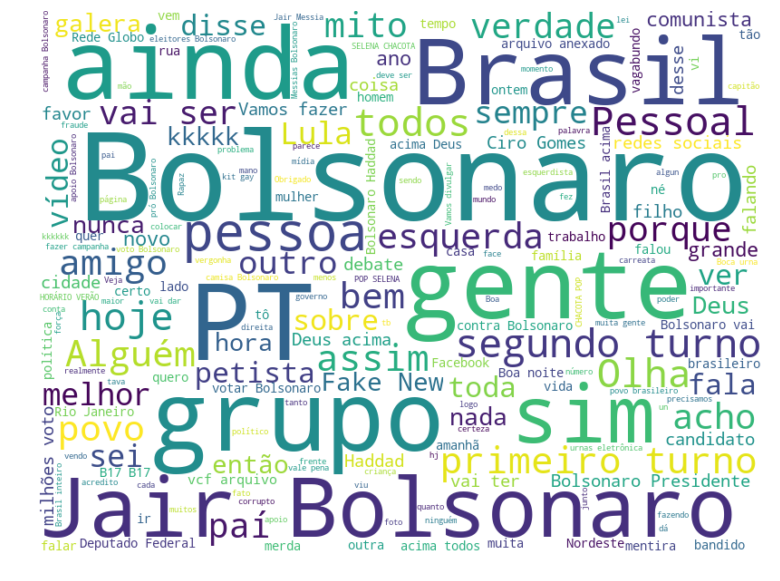

In [90]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Queries

In [91]:
def haveWord(word,text):
    word = word.lower()
    text = str(text).lower()
    if word in text:
        return True
    else:
        return False
    
def haveRegex(regex,text):
    matches = re.findall(regex,text)
    if matches:
        return True
    else:
        return False

In [94]:
df_query = df[df.apply(lambda x: haveWord('ptralha',x['text']),axis=1)]
print(len(df_query))
for m in list(df_query['text'].unique()):
    print(m)
    print('***')

82
Mais uma vez o PT deu tiro no pé, veja o que o rapper Mano Brown disse em frente aos PTralhas.
***
ATENÇÃO
Pessoal, estive verificando o que aconteceu no outro grupo.
O número [TELEFONE] é do principal responsável que se infiltrou como administrador. Essa pessoa usa até a imagem a imagem pró Bolsonaro para se infiltrar no grupo.

A ação de excluir os administradores e tomar conta do grupo ocorreu por 4 PTralhas que começaram a remover no mesmo instante.
São eles:
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
👆🏻Estes foram os principais PTralhas.

Foram adicionados no grupo, principalmente pelo primeiro PTralha 👆🏻os seguintes números também de esquerdopatas:
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art.171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TELEFONE] (art. 171)
[TELEFONE]
[TELEFONE]
[TELEFONE]
[TEL